In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_csv('cia_Gini.csv') #gini
df2 = pd.read_csv('cia_Birth_rate.csv') # birth_rate
df3 = pd.read_csv('cia_Obesity.csv') # obesity
df4 = pd.read_csv('cia_Unemployement_rate.csv') #unemployemnt_rate
df5 = pd.read_csv('cia_Life_expectancy.csv') #life_exp
df6 = pd.read_csv('cia_Gdp.csv') #gdp_cap
df7 = pd.read_csv('cia_Renewables.csv') #energy_renewables
df8 = pd.read_csv('cia_Population.csv') #population

df1 = df1[['name','Gini']]
df2 = df2[['name','birth_rate']]
df4 = df4[['name','unemployement_rate']]
df5 = df5[['name','life_expectancy']]
df6 = df6[['name','gdp_per_capita']]
df3 = df3[['name','obesity']]
df7 = df7[['name','energy_renewables']]
df8 = df8[['name','population']]

df = pd.merge(df1, df2, on="name")
df = pd.merge(df, df3, on="name")
df = pd.merge(df, df4, on="name")
df = pd.merge(df, df5, on="name")
df = pd.merge(df, df6, on="name")
df = pd.merge(df, df7, on="name")
df = pd.merge(df, df8, on="name")

In [5]:
df

,name,Gini,birth_rate,obesity,unemployement_rate,life_expectancy,gdp_per_capita,energy_renewables,population
0,Tonga,48.2,20.60,37.6,1.10,77.29,6400,26,105780
1,Samoa,47.3,19.32,38.7,5.20,74.92,6300,29,204898
2,"Micronesia, Federated States of",45.8,18.65,40.1,16.20,74.17,3500,3,101675
3,United States,36.2,12.33,41.1,3.89,80.43,60200,14,334998398
4,Jordan,35.5,22.79,33.7,19.10,75.75,9800,12,10909567
...,...,...,...,...,...,...,...,...,...
150,Cambodia,3.9,20.84,37.9,0.30,66.27,4200,2,17304363
151,India,3.9,17.53,35.7,8.50,70.03,6100,16,1339330514
152,Timor-Leste,3.8,31.45,28.7,4.40,69.62,3200,0,1413958
153,Bangladesh,3.6,17.88,32.4,4.40,74.43,4800,2,164098818


# Chi-Quadrat Test Obesitätsrate-> Gammaverteilt

In [6]:
def gammapar(mean, var):
    #mean = al/be
    #var = al/be**2
    be = mean/var
    return [mean*be, var*be**2], be

def shapepar(av):
    return av/(av-1)

def prob(arg):
    a, b = arg
    p1 = stats.gamma.cdf(32, a, scale = 1/b) - stats.gamma.cdf(0, a, scale = 1/b)
    p2 = stats.gamma.cdf(35.5, a, scale = 1/b) - stats.gamma.cdf(32, a, scale = 1/b)
    p3 = stats.gamma.cdf(39, a, scale = 1/b) - stats.gamma.cdf(35.5, a, scale = 1/b)
    p4 = stats.gamma.cdf(44, a, scale = 1/b) - stats.gamma.cdf(39, a, scale = 1/b)
    p5 = 1 - stats.gamma.cdf(44, a, scale = 1/b)

    p = [p1, p2, p3, p4, p5]
    return p

gruppe1=df[df['obesity']<32]['obesity'].dropna() #19
gruppe2=df[32<=df['obesity']][df['obesity']<35.5]['obesity'].dropna() #21
gruppe3=df[35.5<=df['obesity']][df['obesity']<39]['obesity'].dropna() #21
gruppe4=df[39<=df['obesity']][df['obesity']<44]['obesity'].dropna() #18
gruppe5=df[44<=df['obesity']]['obesity'].dropna() #21

y = [len(gruppe1), len(gruppe2), len(gruppe3), len(gruppe4), len(gruppe5)]

def test1(arg):
    a, b = arg
    p1 = prob([a, b])
    t1 = 0
    n = np.sum(y)
    for i in range(5):
        t1 = t1 + (y[i]-n*p1[i])**2/(n*p1[i])
    return t1

<ipython-input-6-6c382c527bd4>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gruppe2=df[32<=df['obesity']][df['obesity']<35.5]['obesity'].dropna() #21
<ipython-input-6-6c382c527bd4>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gruppe3=df[35.5<=df['obesity']][df['obesity']<39]['obesity'].dropna() #21
<ipython-input-6-6c382c527bd4>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gruppe4=df[39<=df['obesity']][df['obesity']<44]['obesity'].dropna() #18


In [7]:
np.sum(y)

155

In [8]:
prob([24.85588863961961, 0.6529383508416304])

[0.21962671854828109,
 0.17131937938267988,
 0.1835761849207203,
 0.21534935875172323,
 0.2101283583965955]

In [9]:
#minimise teststat
import scipy.optimize as optimize # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

optab = optimize.minimize(test1, x0 = [24.85588863961961, 0.6529383508416304])

In [10]:
test1([optab.x[0],  optab.x[1]])

1.21893498672875

In [11]:
alpha = 0.1

if (test1([optab.x[0],  optab.x[1]]) >= stats.chi2.ppf(1-alpha, df=2, loc=0, scale=1)): #df should be = 3 in this case df = k - m - 1
    print("ABGELEHNT")
    print(test1([optab.x[0],  optab.x[1]]), ">=", stats.chi2.ppf(1-alpha, df=2, loc=0, scale=1))
else:
    print("NICHT ABGELEHNT")
    print(test1([optab.x[0],  optab.x[1]]), "=<", stats.chi2.ppf(1-alpha, df=2, loc=0, scale=1))

NICHT ABGELEHNT
1.21893498672875 =< 4.605170185988092


In [12]:
obpar = gammapar(df['obesity'].mean(), df['obesity'].var())

In [218]:
len(df[df['obesity']>44])

32

In [128]:
df['obesity'].describe()

count    155.000000
mean      38.067742
std        7.635588
min       24.200000
25%       32.800000
50%       36.800000
75%       42.700000
max       63.000000
Name: obesity, dtype: float64

[]

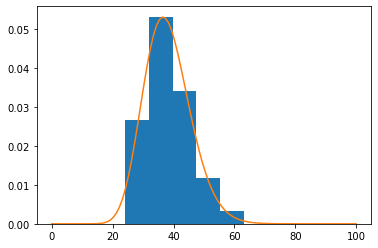

In [13]:
axis = np.linspace(0, 100, 100)

plt.hist(df['obesity'], density = True, bins = 5)
plt.plot(axis, stats.gamma.pdf(axis, obpar[0][0], scale = 1/obpar[1]))
plt.plot()

# Obesitätsrate->Betadistribution?

In [14]:
def prob2(arg):
    a, b = arg
    p1 = stats.beta.cdf(0.32, a, b) - stats.beta.cdf(0, a, b)
    p2 = stats.beta.cdf(0.355, a, b) - stats.beta.cdf(0.32, a, b)
    p3 = stats.beta.cdf(0.39, a, b) - stats.beta.cdf(0.355, a, b)
    p4 = stats.beta.cdf(0.44, a, b) - stats.beta.cdf(0.39, a, b)
    p5 = 1 - stats.beta.cdf(0.44, a, b)

    p = [p1, p2, p3, p4, p5]
    return p

gruppe1=df[df['obesity']<32]['obesity'].dropna() #19
gruppe2=df[32<=df['obesity']][df['obesity']<35.5]['obesity'].dropna() #21
gruppe3=df[35.5<=df['obesity']][df['obesity']<39]['obesity'].dropna() #21
gruppe4=df[39<=df['obesity']][df['obesity']<44]['obesity'].dropna() #18
gruppe5=df[44<=df['obesity']]['obesity'].dropna() #21

y = [len(gruppe1), len(gruppe2), len(gruppe3), len(gruppe4), len(gruppe5)]

def test2(arg):
    a, b = arg
    p2 = prob2([a, b])
    t1 = 0
    n = np.sum(y)
    for i in range(5):
        t1 = t1 + (y[i]-n*p2[i])**2/(n*p2[i])
    return t1

<ipython-input-14-89c5f69a62db>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gruppe2=df[32<=df['obesity']][df['obesity']<35.5]['obesity'].dropna() #21
<ipython-input-14-89c5f69a62db>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gruppe3=df[35.5<=df['obesity']][df['obesity']<39]['obesity'].dropna() #21
<ipython-input-14-89c5f69a62db>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gruppe4=df[39<=df['obesity']][df['obesity']<44]['obesity'].dropna() #18


In [15]:
prob2([2, 5])

[0.6219772723200006,
 0.06823688916132764,
 0.06062992972367187,
 0.07292174047499977,
 0.17623416832000016]

In [16]:
#minimise teststat
import scipy.optimize as optimize # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

optab2 = optimize.minimize(test2, x0 = [2, 5])

In [17]:
optab2

      fun: 2.055050758148447
 hess_inv: array([[3.65037839, 5.8845215 ],
       [5.8845215 , 9.73740971]])
      jac: array([8.07642937e-06, 2.02655792e-06])
  message: 'Optimization terminated successfully.'
     nfev: 51
      nit: 16
     njev: 17
   status: 0
  success: True
        x: array([16.61856532, 27.40880635])

In [18]:
test2(optab2.x)

2.055050758148447

[]

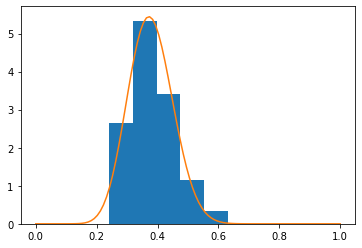

In [19]:
axis = np.linspace(0, 1, 100)

plt.hist(df['obesity']/100, density = True, bins = 5)
plt.plot(axis, stats.beta.pdf(axis, a = optab2.x[0], b = optab2.x[1]))
#plt.plot(axis, stats.beta.pdf(axis, 16.6, 27.4))
plt.plot()

In [20]:
alpha = 0.1

if (test2(optab2.x) >= stats.chi2.ppf(1-alpha, df=2, loc=0, scale=1)): #df should be = 2 in this case df = k - m - 1
    print("ABGELEHNT")
    print(test2(optab2.x), ">=", stats.chi2.ppf(1-alpha, df=2, loc=0, scale=1))
else:
    print("NICHT ABGELEHNT")
    print(test2(optab2.x), "=<", stats.chi2.ppf(1-alpha, df=2, loc=0, scale=1))

NICHT ABGELEHNT
2.055050758148447 =< 4.605170185988092


# Arbeitslosigkeitsrate->Betaverteilung?

In [21]:
df['unemployement_rate'].describe()

count    155.000000
mean       9.880129
std       10.439814
min        0.300000
25%        3.945000
50%        6.550000
75%       11.500000
max       77.000000
Name: unemployement_rate, dtype: float64

In [22]:
def prob3(arg):
    a, b = arg
    p1 = stats.beta.cdf(0.035, a, b) - stats.beta.cdf(0, a, b)
    p2 = stats.beta.cdf(0.055, a, b) - stats.beta.cdf(0.035, a, b)
    p3 = stats.beta.cdf(0.08, a, b) - stats.beta.cdf(0.055, a, b)
    p4 = stats.beta.cdf(0.13, a, b) - stats.beta.cdf(0.08, a, b)
    p5 = 1 - stats.beta.cdf(0.13, a, b)

    p = [p1, p2, p3, p4, p5]
    return p

gruppe1=df[df['unemployement_rate']<3.5]['unemployement_rate'].dropna() #19
gruppe2=df[3.5<=df['unemployement_rate']][df['unemployement_rate']<5.5]['unemployement_rate'].dropna() #21
gruppe3=df[5.5<=df['unemployement_rate']][df['unemployement_rate']<8]['unemployement_rate'].dropna() #21
gruppe4=df[8<=df['unemployement_rate']][df['unemployement_rate']<13]['unemployement_rate'].dropna() #18
gruppe5=df[13<=df['unemployement_rate']]['unemployement_rate'].dropna() #21

y = [len(gruppe1), len(gruppe2), len(gruppe3), len(gruppe4), len(gruppe5)]

def test3(arg):
    a, b = arg
    p2 = prob3([a, b])
    t1 = 0
    n = np.sum(y)
    for i in range(5):
        t1 = t1 + (y[i]-n*p2[i])**2/(n*p2[i])
    return t1

<ipython-input-22-4f8950de3fe5>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gruppe2=df[3.5<=df['unemployement_rate']][df['unemployement_rate']<5.5]['unemployement_rate'].dropna() #21
<ipython-input-22-4f8950de3fe5>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gruppe3=df[5.5<=df['unemployement_rate']][df['unemployement_rate']<8]['unemployement_rate'].dropna() #21
<ipython-input-22-4f8950de3fe5>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gruppe4=df[8<=df['unemployement_rate']][df['unemployement_rate']<13]['unemployement_rate'].dropna() #18


In [29]:
y

[34, 31, 30, 27, 33]

In [24]:
#minimise teststat
import scipy.optimize as optimize # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

optab3 = optimize.minimize(test3, x0 = [2, 5])

In [25]:
optab3

      fun: 4.354175238945333
 hess_inv: array([[0.0277273 , 0.31344531],
       [0.31344531, 4.26802543]])
      jac: array([1.49011612e-06, 6.55651093e-07])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 15
     njev: 16
   status: 0
  success: True
        x: array([ 1.60040913, 17.60845438])

In [26]:
test3(optab3.x)

4.354175238945333

[]

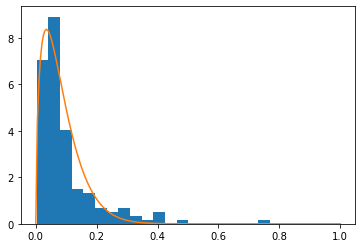

In [27]:
axis = np.linspace(0, 1, 200)

plt.hist(df['unemployement_rate']/100, density = True, bins = 20)
plt.plot(axis, stats.beta.pdf(axis, a = optab3.x[0], b = optab3.x[1]))
#plt.plot(axis, stats.beta.pdf(axis, 16.6, 27.4))
plt.plot()

In [28]:
alpha = 0.1

if (test3(optab3.x) >= stats.chi2.ppf(1-alpha, df=2, loc=0, scale=1)): #df should be = 2 in this case df = k - m - 1
    print("ABGELEHNT")
    print(test3(optab3.x), ">=", stats.chi2.ppf(1-alpha, df=2, loc=0, scale=1))
else:
    print("NICHT ABGELEHNT")
    print(test3(optab3.x), "=<", stats.chi2.ppf(1-alpha, df=2, loc=0, scale=1))

NICHT ABGELEHNT
4.354175238945333 =< 4.605170185988092


# BIP pro Kopf --> Gammaverteilung?

In [30]:
df['gdp_per_capita'].describe()

count       155.000000
mean      19666.477419
std       20518.675344
min         900.000000
25%        4750.000000
50%       12300.000000
75%       28600.000000
max      110300.000000
Name: gdp_per_capita, dtype: float64

In [31]:
def gammapar(mean, var):
    #mean = al/be
    #var = al/be**2
    be = mean/var
    return [mean*be, var*be**2], be

def prob4(arg):
    a, b = arg
    p1 = stats.gamma.cdf(4000, a, scale = 1/b) - stats.gamma.cdf(0, a, scale = 1/b)
    p2 = stats.gamma.cdf(9000, a, scale = 1/b) - stats.gamma.cdf(4000, a, scale = 1/b)
    p3 = stats.gamma.cdf(15000, a, scale = 1/b) - stats.gamma.cdf(9000, a, scale = 1/b)
    p4 = stats.gamma.cdf(35000, a, scale = 1/b) - stats.gamma.cdf(15000, a, scale = 1/b)
    p5 = 1 - stats.gamma.cdf(35000, a, scale = 1/b)

    p = [p1, p2, p3, p4, p5]
    return p

gruppe1=df[df['gdp_per_capita']<4000]['gdp_per_capita'].dropna() #19
gruppe2=df[4000<=df['gdp_per_capita']][df['gdp_per_capita']<9000]['gdp_per_capita'].dropna() #21
gruppe3=df[9000<=df['gdp_per_capita']][df['gdp_per_capita']<15000]['gdp_per_capita'].dropna() #21
gruppe4=df[15000<=df['gdp_per_capita']][df['gdp_per_capita']<35000]['gdp_per_capita'].dropna() #18
gruppe5=df[35000<=df['gdp_per_capita']]['gdp_per_capita'].dropna() #21

y = [len(gruppe1), len(gruppe2), len(gruppe3), len(gruppe4), len(gruppe5)]

def test4(arg):
    a, b = arg
    p1 = prob4([a, b])
    t1 = 0
    n = np.sum(y)
    for i in range(5):
        t1 = t1 + (y[i]-n*p1[i])**2/(n*p1[i])
    return t1

<ipython-input-31-d05f0e338c2b>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gruppe2=df[4000<=df['gdp_per_capita']][df['gdp_per_capita']<9000]['gdp_per_capita'].dropna() #21
<ipython-input-31-d05f0e338c2b>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gruppe3=df[9000<=df['gdp_per_capita']][df['gdp_per_capita']<15000]['gdp_per_capita'].dropna() #21
<ipython-input-31-d05f0e338c2b>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gruppe4=df[15000<=df['gdp_per_capita']][df['gdp_per_capita']<35000]['gdp_per_capita'].dropna() #18


In [33]:
y

[31, 33, 28, 30, 33]

In [32]:
initialguess = gammapar(df['gdp_per_capita'].mean(), df['gdp_per_capita'].var())

In [433]:
initialguess

([0.9186593841854965, 0.9186593841854965], 4.6711943608233285e-05)

In [432]:
test4([initialguess[0][0], initialguess[1]])

7.301662249668125

In [422]:
prob4([initialguess[0][0], initialguess[1]])

[0.20254976713116618,
 0.18126373015884562,
 0.15994787771612218,
 0.2844360602923859,
 0.17180256470148014]

In [528]:
#minimise teststat
import scipy.optimize as optimize # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

optab4 = optimize.minimize(test4, x0 = [initialguess[0][0], initialguess[1]], bounds = [(0, 2), (0,0.0001)])

<ipython-input-420-d05f0e338c2b>:9: RuntimeWarning: divide by zero encountered in double_scalars
  p1 = stats.gamma.cdf(4000, a, scale = 1/b) - stats.gamma.cdf(0, a, scale = 1/b)
<ipython-input-420-d05f0e338c2b>:10: RuntimeWarning: divide by zero encountered in double_scalars
  p2 = stats.gamma.cdf(9000, a, scale = 1/b) - stats.gamma.cdf(4000, a, scale = 1/b)
<ipython-input-420-d05f0e338c2b>:11: RuntimeWarning: divide by zero encountered in double_scalars
  p3 = stats.gamma.cdf(15000, a, scale = 1/b) - stats.gamma.cdf(9000, a, scale = 1/b)
<ipython-input-420-d05f0e338c2b>:12: RuntimeWarning: divide by zero encountered in double_scalars
  p4 = stats.gamma.cdf(35000, a, scale = 1/b) - stats.gamma.cdf(15000, a, scale = 1/b)
<ipython-input-420-d05f0e338c2b>:13: RuntimeWarning: divide by zero encountered in double_scalars
  p5 = 1 - stats.gamma.cdf(35000, a, scale = 1/b)
<ipython-input-420-d05f0e338c2b>:32: RuntimeWarning: divide by zero encountered in double_scalars
  t1 = t1 + (y[i]-n*p1[

In [529]:
optab4

      fun: 7.301662249668125
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.67257514e+00,  2.48568797e+05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 9
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([9.18659384e-01, 4.67119436e-05])

In [531]:
test4([9.18659384e-01, 4.67119436e-05])

7.301662247936912

[]

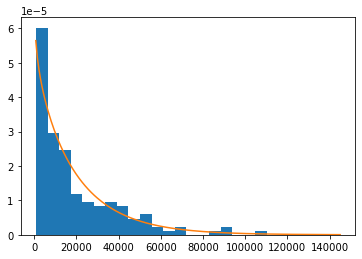

In [541]:
axis = np.linspace(0, 145000, 200)

plt.hist(df['gdp_per_capita'], density = True, bins = 20)
plt.plot(axis, stats.gamma.pdf(axis, optab4.x[0], scale = 1/optab4.x[1]))
#plt.plot(axis, stats.beta.pdf(axis, 16.6, 27.4))
plt.plot()

In [539]:
alpha = 0.1

if (test4(optab4.x) >= stats.chi2.ppf(1-alpha, df=2, loc=0, scale=1)): #df should be = 2 in this case df = k - m - 1
    print("ABGELEHNT")
    print(test4(optab4.x), ">=", stats.chi2.ppf(1-alpha, df=2, loc=0, scale=1))
else:
    print("NICHT ABGELEHNT")
    print(test4(optab4.x), "=<", stats.chi2.ppf(1-alpha, df=2, loc=0, scale=1))

ABGELEHNT
7.301662249668125 >= 4.605170185988092


# Geburtenrate->Gammaverteilung?

In [542]:
df['birth_rate'].describe()

count    155.000000
mean      18.682129
std        9.216720
min        6.890000
25%       11.325000
50%       16.510000
75%       23.140000
max       47.280000
Name: birth_rate, dtype: float64

In [561]:
def prob5(arg):
    a, b = arg
    p1 = stats.gamma.cdf(10.5, a, scale = 1/b) - stats.gamma.cdf(0, a, scale = 1/b)
    p2 = stats.gamma.cdf(15, a, scale = 1/b) - stats.gamma.cdf(10.5, a, scale = 1/b)
    p3 = stats.gamma.cdf(18, a, scale = 1/b) - stats.gamma.cdf(15, a, scale = 1/b)
    p4 = stats.gamma.cdf(27, a, scale = 1/b) - stats.gamma.cdf(18, a, scale = 1/b)
    p5 = 1 - stats.gamma.cdf(27, a, scale = 1/b)

    p = [p1, p2, p3, p4, p5]
    return p

gruppe1=df[df['birth_rate']<10.5]['birth_rate'].dropna() #19
gruppe2=df[10.5<=df['birth_rate']][df['birth_rate']<15]['birth_rate'].dropna() #21
gruppe3=df[15<=df['birth_rate']][df['birth_rate']<18]['birth_rate'].dropna() #21
gruppe4=df[18<=df['birth_rate']][df['birth_rate']<27]['birth_rate'].dropna() #18
gruppe5=df[27<=df['birth_rate']]['birth_rate'].dropna() #21

y = [len(gruppe1), len(gruppe2), len(gruppe3), len(gruppe4), len(gruppe5)]

def test5(arg):
    a, b = arg
    p1 = prob5([a, b])
    t1 = 0
    n = np.sum(y)
    for i in range(5):
        t1 = t1 + (y[i]-n*p1[i])**2/(n*p1[i])
    return t1

<ipython-input-561-d6a070dd6576>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gruppe2=df[10.5<=df['birth_rate']][df['birth_rate']<15]['birth_rate'].dropna() #21
<ipython-input-561-d6a070dd6576>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gruppe3=df[15<=df['birth_rate']][df['birth_rate']<18]['birth_rate'].dropna() #21
<ipython-input-561-d6a070dd6576>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gruppe4=df[18<=df['birth_rate']][df['birth_rate']<27]['birth_rate'].dropna() #18


In [569]:
gammapar(df['birth_rate'].mean(), df['birth_rate'].var())

([4.108657830695795, 4.108657830695795], 0.21992449702073322)

In [565]:
prob5([gammapar(df['birth_rate'].mean(), df['birth_rate'].var())[0][0], gammapar(df['birth_rate'].mean(), df['birth_rate'].var())[1]])

[0.18574101177143118,
 0.21123898580400133,
 0.13921676415975676,
 0.29408641781551337,
 0.16971682044929737]

In [570]:
optab5 = optimize.minimize(test5, x0 = [4.108657830695795, 0.21992449702073322])

In [571]:
optab5

      fun: 5.97472124561184
 hess_inv: array([[0.15367306, 0.00850454],
       [0.00850454, 0.00050811]])
      jac: array([ 5.54323196e-06, -9.65595245e-06])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 7
     njev: 11
   status: 0
  success: True
        x: array([3.60081555, 0.1943843 ])

[]

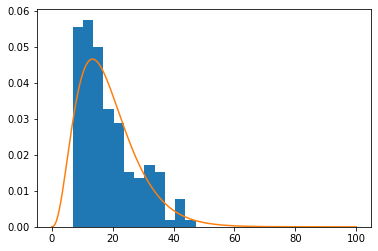

In [586]:
axis = np.linspace(0, 100, 200)

plt.hist(df['birth_rate'], density = True, bins = 12)
plt.plot(axis, stats.gamma.pdf(axis, optab5.x[0], scale = 1/optab5.x[1]))
#plt.plot(axis, stats.beta.pdf(axis, 16.6, 27.4))
plt.plot()

In [587]:
alpha = 0.1

if (test5(optab5.x) >= stats.chi2.ppf(1-alpha, df=2, loc=0, scale=1)): #df should be = 2 in this case df = k - m - 1
    print("ABGELEHNT")
    print(test5(optab5.x), ">=", stats.chi2.ppf(1-alpha, df=2, loc=0, scale=1))
else:
    print("NICHT ABGELEHNT")
    print(test5(optab5.x), "=<", stats.chi2.ppf(1-alpha, df=2, loc=0, scale=1))

ABGELEHNT
5.97472124561184 >= 4.605170185988092


# Lebenserwartung->Gammaverteilung?

In [588]:
df['life_expectancy'].describe()

count    155.000000
mean      73.535419
std        6.941506
min       53.250000
25%       69.345000
50%       74.960000
75%       78.360000
max       86.190000
Name: life_expectancy, dtype: float64

In [632]:
def prob6(arg):
    a, b = arg
    p1 = stats.gamma.cdf(67, a, scale = 1/b) - stats.gamma.cdf(0, a, scale = 1/b)
    p2 = stats.gamma.cdf(73, a, scale = 1/b) - stats.gamma.cdf(67, a, scale = 1/b)
    p3 = stats.gamma.cdf(76.5, a, scale = 1/b) - stats.gamma.cdf(73, a, scale = 1/b)
    p4 = stats.gamma.cdf(79.5, a, scale = 1/b) - stats.gamma.cdf(76.5, a, scale = 1/b)
    p5 = 1 - stats.gamma.cdf(79.5, a, scale = 1/b)

    p = [p1, p2, p3, p4, p5]
    return p

gruppe1=df[df['life_expectancy']<67]['life_expectancy'].dropna() #19
gruppe2=df[67<=df['life_expectancy']][df['life_expectancy']<73]['life_expectancy'].dropna() #21
gruppe3=df[73<=df['life_expectancy']][df['life_expectancy']<76.5]['life_expectancy'].dropna() #21
gruppe4=df[76.5<=df['life_expectancy']][df['life_expectancy']<79.5]['life_expectancy'].dropna() #18
gruppe5=df[79.5<=df['life_expectancy']]['life_expectancy'].dropna() #21

y = [len(gruppe1), len(gruppe2), len(gruppe3), len(gruppe4), len(gruppe5)]

def test6(arg):
    a, b = arg
    p1 = prob6([a, b])
    t1 = 0
    n = np.sum(y)
    for i in range(5):
        t1 = t1 + (y[i]-n*p1[i])**2/(n*p1[i])
    return t1

<ipython-input-632-e0845b302c68>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gruppe2=df[67<=df['life_expectancy']][df['life_expectancy']<73]['life_expectancy'].dropna() #21
<ipython-input-632-e0845b302c68>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gruppe3=df[73<=df['life_expectancy']][df['life_expectancy']<76.5]['life_expectancy'].dropna() #21
<ipython-input-632-e0845b302c68>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gruppe4=df[76.5<=df['life_expectancy']][df['life_expectancy']<79.5]['life_expectancy'].dropna() #18


In [633]:
y

[32, 32, 31, 28, 32]

In [634]:
gammapar(df['life_expectancy'].mean(), df['life_expectancy'].var())

([112.22401114261095, 112.22401114261093], 1.5261218624603716)

In [635]:
optab6 = optimize.minimize(test6, x0 = [112.22401114261095, 1.5261218624603716])

In [636]:
optab6

      fun: 7.491325406940097
 hess_inv: array([[3.62330579e+01, 4.93923748e-01],
       [4.93923748e-01, 6.78917218e-03]])
      jac: array([ 7.15255737e-07, -1.25169754e-06])
  message: 'Optimization terminated successfully.'
     nfev: 57
      nit: 13
     njev: 19
   status: 0
  success: True
        x: array([94.6899751 ,  1.28020442])

[]

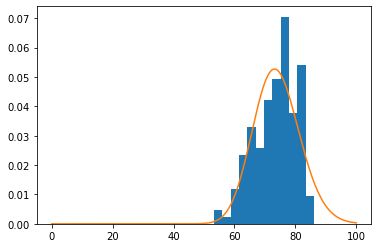

In [640]:
axis = np.linspace(0, 100, 200)

plt.hist(df['life_expectancy'], density = True, bins = 12)
plt.plot(axis, stats.gamma.pdf(axis, optab6.x[0], scale = 1/optab6.x[1]))
#plt.plot(axis, stats.beta.pdf(axis, 16.6, 27.4))
plt.plot()

In [643]:
alpha = 0.1

if (test6(optab6.x) >= stats.chi2.ppf(1-alpha, df=2, loc=0, scale=1)): #df should be = 2 in this case df = k - m - 1
    print("ABGELEHNT")
    print(test5(optab5.x), ">=", stats.chi2.ppf(1-alpha, df=2, loc=0, scale=1))
else:
    print("NICHT ABGELEHNT")
    print(test6(optab6.x), "=<", stats.chi2.ppf(1-alpha, df=2, loc=0, scale=1))

ABGELEHNT
11.610426864051373 >= 4.605170185988092
